In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

### Data

In [2]:
cre = pd.read_csv('../datasets/cre_dataset.csv')
pdb = pd.read_csv('../datasets/uniprot_pdb.tsv', sep= '\t')
cre_pdb_count = pd.read_csv('../datasets/cre_pdb_count.tsv', sep= '\t')
fl = pd.read_csv('../datasets/flipper_consensus.tsv', sep= '\t')

In [3]:
import matplotlib

In [4]:
print(f"No. of unique CREs: {cre.id_cre.nunique()}")

No. of unique CREs: 168


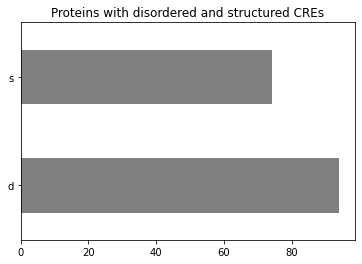

In [3]:
# How many proteins with disordered and structured CREs
cre.module.value_counts().plot(kind= 'barh', color= 'gray')
plt.title("Proteins with disordered and structured CREs")
plt.show()

In [5]:
d_cre = cre.uniprot_acc[cre.module == 'd'].unique().tolist()
s_cre = cre.uniprot_acc[cre.module == 's'].unique().tolist()

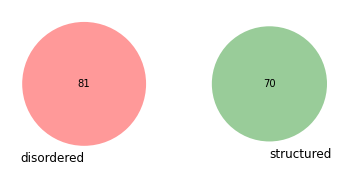

In [6]:
# They do not overlap
venn2([set(d_cre), set(s_cre)], set_labels= ['disordered', 'structured'])

#### Distribution per specie

In [7]:
species = cre.species.value_counts().to_frame().reset_index().rename(columns= {'index': 'specie', 'species': 'count'})

In [8]:
eukarya = ["H. sapiens", "M. musculus", "S. cerevisiae", "R. norvegicus", "D. melanogaster", "G. gallus", "C. elegans", "D. rerio", "C. griseus", "S. vulgare", "S. pombe", "A. castellanii", "S. crevisiae"]
bacteria = ["E. coli", "C. glutamicum", "B. amyloliquefaciens", "P. fluorescens", "L. monocytogenes"]
virus = ["Enterobacteria phage T4", "Hepatitis C virus genotype 1b"]


In [9]:
species["domain"] = None
for i in species.index:
    if species.specie[i] in eukarya:
        species["domain"][i] = "eukarya"
    if species.specie[i] in bacteria:
        species["domain"][i] = "bacteria"
    if species.specie[i] in virus:
        species["domain"][i] = "virus"

<ipython-input-9-3976867e3bba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species["domain"][i] = "eukarya"
<ipython-input-9-3976867e3bba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species["domain"][i] = "bacteria"
<ipython-input-9-3976867e3bba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species["domain"][i] = "virus"


In [10]:
# Mapper dict
dom_dict = species.groupby('domain')['specie'].apply(list).to_dict()

In [11]:
g = []
for i in cre.index:
    for k in dom_dict:
        if cre.species[i] in dom_dict[k]:
            g.append(k)
cre["domain"] = g

In [12]:
cre.domain.value_counts()

eukarya     159
bacteria      7
virus         2
Name: domain, dtype: int64

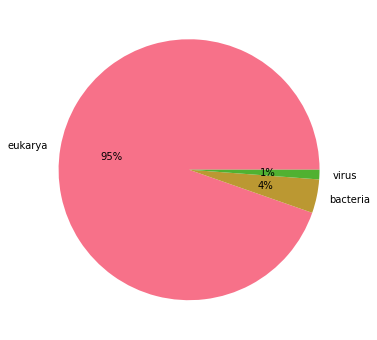

In [13]:
# Plot by domains
sns.set_palette('husl')
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (6, 6))
cre.domain.value_counts().plot(kind= 'pie', autopct='%.0f%%')
ax.set_facecolor('white')
#plt.legend()
plt.ylabel("")
plt.show()

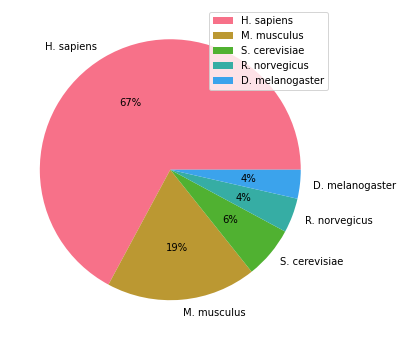

In [14]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (6, 6))
sns.set_palette('pastel')
plt.pie(species['count'][:5], labels= species.specie[:5], autopct='%.0f%%')
ax.set_facecolor('white')
plt.legend()
plt.show()

In [15]:
# Take the first 6 most frequent then group in "others"
species_freq = cre.species.value_counts()
species_freq = species_freq.to_frame().reset_index().rename(columns= {'index': 'specie', 'species': 'freq'})
species_freq

,specie,freq
0,H. sapiens,94
1,M. musculus,26
2,S. cerevisiae,9
3,R. norvegicus,6
4,D. melanogaster,5
5,G. gallus,5
6,C. elegans,3
7,E. coli,3
8,D. rerio,3
9,C. griseus,2


In [16]:
c= 0
indexes_to_drop = []
for i in species_freq.index:
    #print(i)
    v= species_freq.iloc[i]['freq']
    if v < 5:
        c += v
        indexes_to_drop.append(i)
species_freq.drop(species_freq.index[indexes_to_drop], inplace=True)
species_freq.loc[len(species_freq.index)] = ["others", c]

In [17]:
species_freq

,specie,freq
0,H. sapiens,94
1,M. musculus,26
2,S. cerevisiae,9
3,R. norvegicus,6
4,D. melanogaster,5
5,G. gallus,5
6,others,23


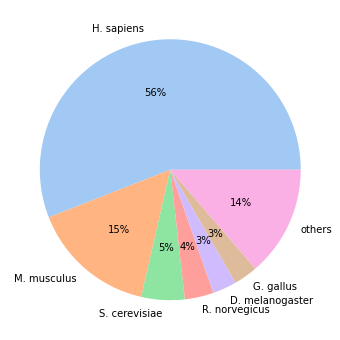

In [18]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (6, 6))
sns.set_palette('pastel')
plt.pie(species_freq.freq, labels= species_freq.specie.tolist(), autopct='%.0f%%')
ax.set_facecolor('white')
#plt.legend()
plt.show()

#### PDB data

In [19]:
pdb

,uniprot_acc,pdb,name,module
0,O08722,3g5b,UNC5b,s
1,O08808,4uwx,mDIA1,d
2,O08808,1z2c,mDIA1,d
3,O08808,3eg5,mDIA1,d
4,O08808,2bnx,mDIA1,d
...,...,...,...,...
2481,Q9Y613,6xf1,FHOD1,d
2482,Q9Y613,3dad,FHOD1,d
2483,Q9Y613,6xf2,FHOD1,d
2484,Q9Z0R4,3jv3,Intersectin-1L,s


In [20]:
pdb_count

NameError: name 'pdb_count' is not defined

#### How many proteins have structure?

In [ ]:
pdb.uniprot_acc.nunique()

123

In [ ]:
pdb.uniprot_acc.nunique() / cre.uniprot_acc.nunique()

0.8145695364238411

In [ ]:
# Boolean col of PDB for each protein
cre['pdb'] = cre.uniprot_acc.isin(pdb.uniprot_acc.unique())

In [ ]:
pdb_count = cre.groupby(['module', 'pdb']).size().to_frame().reset_index().rename(columns= {0: 'count'})
#pdb_count.module = pdb_count.module.rename({'d': 'disordered', 's': 'structured'})
pdb_count

,module,pdb,count
0,d,False,23
1,d,True,71
2,s,False,8
3,s,True,66


In [ ]:
pdb_count = pdb_count.pivot_table(values= 'count', index= 'module', columns= 'pdb')

In [ ]:
pdb_count.rename({'False': 'no PDB', 'True': 'PDB'}, axis=1)

pdb,False,True
module,,
d,23,71
s,8,66


<Figure size 720x360 with 0 Axes>

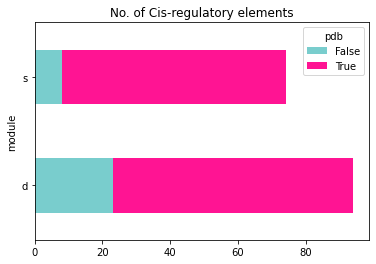

In [ ]:
plt.figure(figsize= (10, 5))
pdb_count.plot(kind= 'barh', stacked= True, color= ['#79CDCD', '#FF1493'])
plt.title("No. of Cis-regulatory elements")
plt.show()

In [92]:
cre_pdb_count

,uniprot_acc,id_cre,start,end,no_pdbs
0,A8KAM8,43,1006,1106,0
1,C8ZE58,15,604,741,0
2,O08722,124,544,688,1
3,O08808,72,1180,1199,11
4,O08967,54,251,266,12
...,...,...,...,...,...
163,Q63622,86,158,408,2
164,Q64287,83,410,439,2
165,Q92985,134,404,466,0
166,Q93107,14,91,157,0


---

In [21]:
cre

,name,uniprot_acc,species,references,module,start_aa,end_aa,dataset,id_cre,domain
0,DNMT1,P13864,M. musculus,"(Song et al., 2011; Trudeau et al., 2013)",d,699,733,train,1,eukarya
1,TBP,P20226,H. sapiens,"(Kuddus and Schmidt, 1993; Trudeau et al., 2013)",d,1,55,train,2,eukarya
2,TAK1,Q62073,M. musculus,"(Yamaguchi et al., 1995)",d,1,22,train,3,eukarya
3,SNF1,P06782,S. crevisiae,"(Jiang and Carlson, 1997; Trudeau et al., 2013)",d,392,495,train,4,eukarya
4,TSE1,P10644,H. sapiens,"(Francis et al., 2002)",d,1,98,train,5,eukarya
...,...,...,...,...,...,...,...,...,...,...
163,NLRC4,Q3UP24,M. musculus,"(Hu et al., 2013)",s,299,355,test,164,eukarya
164,Park2,Q9JK66,R. norvegicus,"(Byrd and Weissman, 2013)",s,410,465,test,165,eukarya
165,EB1,Q15691,H. sapiens,"(Kanaba et al., 2013)",s,189,268,test,166,eukarya
166,gp47,P04521,Enterobacteria phage T4,"(Gao and Nelson, 2014)",s,303,320,test,167,virus


---

## LIPs
To do: check overlaps

In [3]:
fl

,uniprot_acc,content_fraction,content_count,length,start,end
0,A0A0D6HTJ9,0.002,1,555,1,1
1,A0A1W2VMW5,0.014,6,434,1,6
2,P0A825,0.019,8,417,1,8
3,Q2YIM3,0.011,5,438,1,5
4,Q8I566,0.014,6,442,1,6
...,...,...,...,...,...,...
7350,Q09666,0.003,16,5890,5654,5669
7351,Q8WXH0,0.002,15,6885,6871,6885
7352,Q03001,0.001,11,7570,7548,7558
7353,Q8NF91,0.003,29,8797,8769,8797
